In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [89]:
%matplotlib inline

In [90]:
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler
from sklearn.cluster import KMeans

In [118]:
from sklearn.impute import SimpleImputer

In [91]:
df = pd.read_csv('/content/cleaned_data.csv')

In [92]:
df.shape

(150000, 53)

In [93]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Me

**Aggregate of Average values**

In [94]:
def helper(field1: str, field2: str, df: pd.DataFrame) -> pd.DataFrame:
    grouped = df.groupby("MSISDN/Number").agg(
        AvgDL=(field1, 'mean'),
        AvgUL=(field2, 'mean')
    )

    # Calculate the average of AvgDL and AvgUL
    grouped['Avg'] = (grouped['AvgDL'] + grouped['AvgUL']) / 2

    # Rename the index to CustomerID
    grouped = grouped.reset_index().rename(columns={"MSISDN/Number": "CustomerID"})

    return grouped

**Aggregate per customer of Average TCP retransmission**

In [95]:
avg_retransmission = helper("TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)", df)
avg_retransmission

,CustomerID,AvgDL,AvgUL,Avg
0,3.360100e+10,2.080991e+07,759658.664811,1.078479e+07
1,3.360100e+10,2.080991e+07,759658.664811,1.078479e+07
2,3.360100e+10,2.080991e+07,759658.664811,1.078479e+07
3,3.360101e+10,1.066000e+03,759658.664811,3.803623e+05
4,3.360101e+10,1.507977e+07,390430.332406,7.735101e+06
...,...,...,...,...
106851,3.379000e+10,2.150440e+05,3001.000000,1.090225e+05
106852,3.379000e+10,2.080991e+07,759658.664811,1.078479e+07
106853,3.197020e+12,2.080991e+07,759658.664811,1.078479e+07
106854,3.370000e+14,2.080991e+07,759658.664811,1.078479e+07


**Aggregate of Average RTT per customer**

In [96]:
avg_rtt = helper("Avg RTT DL (ms)", "Avg RTT UL (ms)",df)
avg_rtt

,CustomerID,AvgDL,AvgUL,Avg
0,3.360100e+10,46.000000,0.000000,23.000000
1,3.360100e+10,30.000000,1.000000,15.500000
2,3.360100e+10,109.795706,17.662883,63.729294
3,3.360101e+10,69.000000,15.000000,42.000000
4,3.360101e+10,57.000000,2.500000,29.750000
...,...,...,...,...
106851,3.379000e+10,42.000000,10.000000,26.000000
106852,3.379000e+10,34.000000,6.000000,20.000000
106853,3.197020e+12,109.795706,17.662883,63.729294
106854,3.370000e+14,109.795706,17.662883,63.729294


**Aggregate of handset type per customer**

In [97]:
def count_handset(df: pd.DataFrame) -> pd.DataFrame:
    grouped = df.groupby(["MSISDN/Number", "Handset Type"]).size().reset_index(name='HandsetTypeCount')
    grouped = grouped.rename(columns={"MSISDN/Number": "User_MSISDN", "Handset Type": "HandsetType"})

    return grouped

In [98]:
count_handset_df = count_handset(df)
print(count_handset_df)

         User_MSISDN                       HandsetType  HandsetTypeCount
0       3.360100e+10    Huawei P20 Lite Huawei Nova 3E                 1
1       3.360100e+10            Apple iPhone 7 (A1778)                 1
2       3.360100e+10                         undefined                 1
3       3.360101e+10           Apple iPhone 5S (A1457)                 1
4       3.360101e+10           Apple iPhone Se (A1723)                 2
...              ...                               ...               ...
106958  3.379000e+10               Huawei Honor 9 Lite                 1
106959  3.379000e+10       Apple iPhone 8 Plus (A1897)                 1
106960  3.197020e+12  Quectel Wireless. Quectel Ec25-E                 1
106961  3.370000e+14                  Huawei B525S-23A                 1
106962  8.823970e+14  Quectel Wireless. Quectel Ec21-E                 1

[106963 rows x 3 columns]


**Aggregate of Average througput**

In [99]:
avg_throughput = helper("Avg Bearer TP DL (kbps)", "Avg Bearer TP UL (kbps)",df)
avg_throughput

,CustomerID,AvgDL,AvgUL,Avg
0,3.360100e+10,37.0,39.0,38.0
1,3.360100e+10,48.0,51.0,49.5
2,3.360100e+10,48.0,49.0,48.5
3,3.360101e+10,204.0,44.0,124.0
4,3.360101e+10,20197.5,8224.5,14211.0
...,...,...,...,...
106851,3.379000e+10,9978.0,387.0,5182.5
106852,3.379000e+10,68.0,48.0,58.0
106853,3.197020e+12,1.0,0.0,0.5
106854,3.370000e+14,11.0,22.0,16.5


**The 10 top and bottom most frequent values**

In [100]:
def helper(field: str, order: str, df: pd.DataFrame) -> pd.DataFrame:
    grouped = df.groupby(field).size().reset_index(name='Frequency')
    sorted_grouped = grouped.sort_values(by='Frequency', ascending=(order.lower() == 'asc'))
    limited_result = sorted_grouped.head(10)

    return limited_result

**Top TCP values**

In [101]:
top_tcp = helper("TCP DL Retrans. Vol (Bytes)", "DESC",df)
top_tcp

,TCP DL Retrans. Vol (Bytes),Frequency
49291,2.080991e+07,88145
881,1.330000e+03,433
1606,2.660000e+03,219
18,3.800000e+01,200
63,9.200000e+01,192
870,1.318000e+03,156
391,5.430000e+02,133
2258,3.990000e+03,114
50,7.600000e+01,108
2840,5.320000e+03,102


**Bottom TCP values**

In [102]:
bottom_tcp = helper("TCP DL Retrans. Vol (Bytes)", "ASC",df)
bottom_tcp

,TCP DL Retrans. Vol (Bytes),Frequency
25937,782404.0,1
34578,2254843.0,1
34579,2254847.0,1
34580,2255332.0,1
34581,2255960.0,1
34582,2256539.0,1
34583,2256871.0,1
34584,2257114.0,1
34585,2257362.0,1
34586,2257493.0,1


**Top RTT values**

In [103]:
top_rtt = helper("Avg RTT DL (ms)", "DESC",df)
top_rtt

,Avg RTT DL (ms),Frequency
108,109.795706,27828
26,28.000000,3553
25,27.000000,3380
32,34.000000,3296
33,35.000000,2892
35,37.000000,2718
34,36.000000,2645
36,38.000000,2547
27,29.000000,2498
24,26.000000,2488


**Bottom RTT values**

In [104]:
bottom_rtt = helper("Avg RTT DL (ms)", "ASC",df)
bottom_rtt

,Avg RTT DL (ms),Frequency
1,2.0,1
2,4.0,2
3,5.0,3
4,6.0,3
5,7.0,4
6,8.0,5
7,9.0,5
0,0.0,9
8,10.0,15
205,206.0,27


**Top Throughput values**

In [105]:
top_throughput = helper("Avg Bearer TP DL (kbps)", "Desc",df)
top_throughput

,Avg Bearer TP DL (kbps),Frequency
23,23.0,7324
43,43.0,4352
44,44.0,4186
6,6.0,3983
22,22.0,2867
48,48.0,2778
63,63.0,2757
42,42.0,2689
45,45.0,2644
47,47.0,2263


**Bottom Throughput values**

In [106]:
bottom_throughput = helper("Avg Bearer TP DL (kbps)", "ASC",df)
bottom_throughput

,Avg Bearer TP DL (kbps),Frequency
20876,31223.0,1
27445,43362.0,1
27442,43355.0,1
27441,43354.0,1
27439,43352.0,1
27438,43351.0,1
27435,43344.0,1
27434,43342.0,1
27433,43340.0,1
27432,43339.0,1


**Aggregate per handset**

In [107]:
def helper(field1: str, field2: str, df: pd.DataFrame) -> pd.DataFrame:
    df['Average'] = (df[field1] + df[field2]) / 2
    grouped = df.groupby("Handset Type", as_index=False)['Average'].mean()
    sorted_grouped = grouped.sort_values(by='Average', ascending=False)
    sorted_grouped = sorted_grouped.rename(columns={"Handset Type": "HandsetType"})

    return sorted_grouped

**Average throguthput per handset**

In [108]:
avg_throughput_per_handset = helper("Avg Bearer TP DL (kbps)", "Avg Bearer TP UL (kbps)",df)
avg_throughput_per_handset

,HandsetType,Average
321,Huawei B715S-23C,54497.115385
706,New-Bund Technol. Mix 2,52605.500000
575,Lg G6+,50067.500000
1393,Zyxel Communicat. Sbg3600,48675.500000
468,Huawei Y9 2019,45869.500000
...,...,...
1225,Test IMEI,1.000000
172,Concox Informati. Concox Gt06 Gt06N Tr06,1.000000
804,Quectel Wireless. Quectel Ec25-E,0.500000
589,Lg Lg-T385,0.000000


**Average TCP per handset**

In [109]:
average_tcp_per_handset = helper("TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)",df)
average_tcp_per_handset

,HandsetType,Average
858,Samsung Galaxy Core 2 (Sm-G355X),2.327950e+07
2,A-Link Telecom I. Cubot Note S,2.070587e+07
1155,Spa Condor Elect. Allure M1 Plus,1.588508e+07
802,Quartel Infotech. Maximus M84,1.564691e+07
1198,Tcl Communicatio. Pixi 4 6 3G Android,1.543098e+07
...,...,...
324,Huawei Bln-Al10,NaN
348,Huawei E587 E587U-2 Turkcell Vinnwifi E587,NaN
901,Samsung Galaxy J8 2018,NaN
1392,Zyxel Communicat. Lte7460,NaN


# **K-means Clustering**

**Creating aggregates**

In [110]:
def aggregate_metrics(df: pd.DataFrame) -> pd.DataFrame:
    agg_df = df.groupby("MSISDN/Number").agg(
        AvgTCP=('TCP DL Retrans. Vol (Bytes)', 'mean'),
        AvgRTT=('Avg RTT DL (ms)', 'mean'),
        AvgThroughput=('Avg Bearer TP DL (kbps)', 'mean')
    ).reset_index()
    agg_df = agg_df.rename(columns={"MSISDN/Number": "CustomerID"})

    return agg_df

In [111]:
agg_df = aggregate_metrics(df)
print(agg_df.head(10))

     CustomerID        AvgTCP      AvgRTT  AvgThroughput
0  3.360100e+10  2.080991e+07   46.000000           37.0
1  3.360100e+10  2.080991e+07   30.000000           48.0
2  3.360100e+10  2.080991e+07  109.795706           48.0
3  3.360101e+10  1.066000e+03   69.000000          204.0
4  3.360101e+10  1.507977e+07   57.000000        20197.5
5  3.360101e+10  1.040634e+07   65.397853         3761.0
6  3.360101e+10  1.045410e+07   19.500000        20485.5
7  3.360101e+10  2.780000e+02   49.000000          747.0
8  3.360101e+10  2.080991e+07  109.795706           38.5
9  3.360102e+10  2.080991e+07   60.000000           75.0


**Handle Outliers**

In [112]:
def handle_outliers(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

In [113]:
agg_df = handle_outliers(agg_df, ["AvgTCP", "AvgRTT", "AvgThroughput"])
print(agg_df.head())

     CustomerID        AvgTCP      AvgRTT  AvgThroughput
0  3.360100e+10  2.080991e+07   46.000000           37.0
1  3.360100e+10  2.080991e+07   30.000000           48.0
2  3.360100e+10  2.080991e+07  109.795706           48.0
3  3.360101e+10  1.066000e+03   69.000000          204.0
4  3.360101e+10  1.507977e+07   57.000000        20197.5


**Normalizing values**

In [114]:
scaler = MinMaxScaler()
columns_to_normalize = ["AvgTCP", "AvgRTT","AvgThroughput"]

customer_id = agg_df['CustomerID']
transformed_data = scaler.fit_transform(agg_df[columns_to_normalize])
normalized_data = pd.DataFrame(transformed_data, columns=columns_to_normalize)

df_normalized = pd.concat([customer_id, normalized_data], axis=1)
df_normalized

,CustomerID,AvgTCP,AvgRTT,AvgThroughput
0,3.360100e+10,0.458987,0.213210,0.000881
1,3.360100e+10,0.458987,0.139050,0.001144
2,3.360100e+10,0.458987,0.508902,0.001144
3,3.360101e+10,0.000023,0.319815,0.004860
4,3.360101e+10,0.332602,0.264195,0.481166
...,...,...,...,...
106851,3.379000e+10,0.004743,0.194670,0.237707
106852,3.379000e+10,0.458987,0.157590,0.001620
106853,3.197020e+12,0.458987,0.508902,0.000024
106854,3.370000e+14,0.458987,0.508902,0.000262


**Plot before clustering**

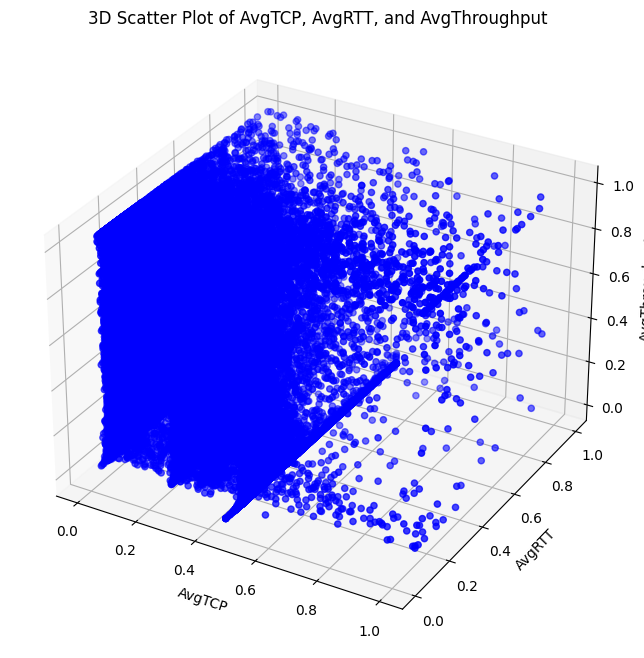

In [115]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_normalized["AvgTCP"], df_normalized["AvgRTT"], df_normalized["AvgThroughput"], c='blue', marker='o')

ax.set_xlabel("AvgTCP")
ax.set_ylabel("AvgRTT")
ax.set_zlabel("AvgThroughput")

plt.title('3D Scatter Plot of AvgTCP, AvgRTT, and AvgThroughput')
plt.show()

**Find the optimal value of K**

In [127]:
imputer = SimpleImputer(strategy='mean')
X = df_normalized[columns_to_normalize]
X_imputed = imputer.fit_transform(X)

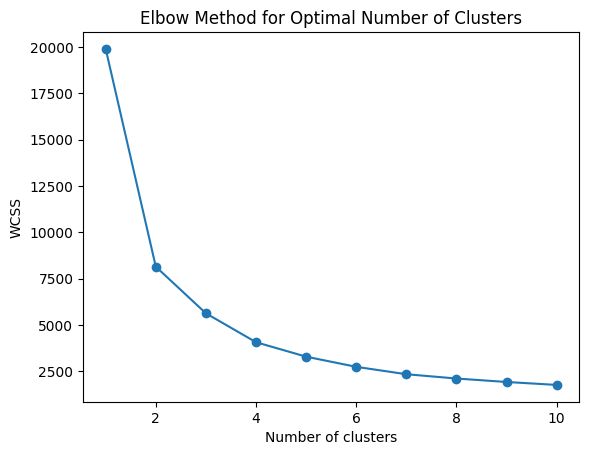

In [128]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_imputed) # Fit KMeans on the imputed data
    wcss.append(kmeans.inertia_)

# Plot WCSS vs. Number of clusters (rest of your code remains the same)
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

**The optimal value for k is 3**

Clustering into k = 3 groups

In [129]:
imputer = SimpleImputer(strategy='mean')
df_normalized[selected_columns] = imputer.fit_transform(df_normalized[selected_columns])
X = df_normalized[selected_columns]
k = 3

kmeans = KMeans(n_clusters=k, random_state=0, n_init=15)
kmeans.fit(X)

df_normalized['Cluster'] = kmeans.labels_

Plot of clusters

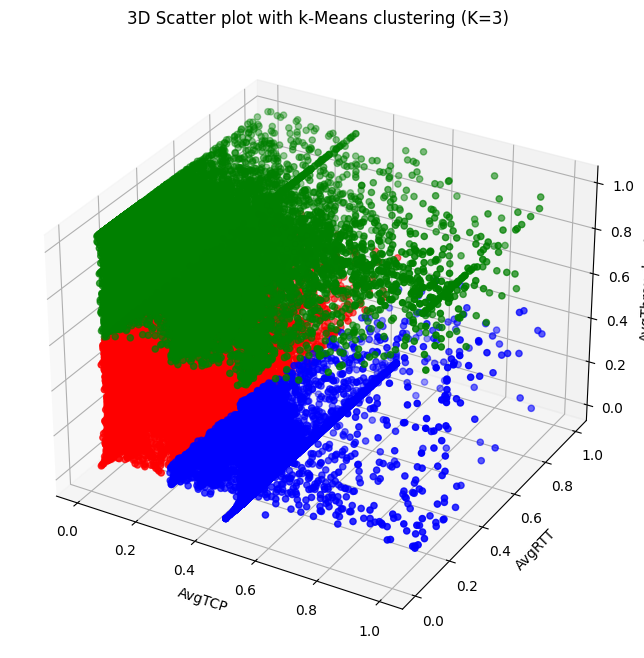

In [130]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

cluster_colors = {0: 'red', 1: 'blue', 2:'green'}


for cluster_label, color in cluster_colors.items():
    cluster_data = df_normalized[df_normalized['Cluster'] == cluster_label]
    ax.scatter(
        cluster_data['AvgTCP'],
        cluster_data['AvgRTT'],
        cluster_data['AvgThroughput'],
        label=f'Cluster {cluster_label}',
        color=color
        )

ax.set_xlabel('AvgTCP')
ax.set_ylabel('AvgRTT')
ax.set_zlabel('AvgThroughput')

plt.title(f'3D Scatter plot with k-Means clustering (K={k})')
plt.show()

**Min, max, mean, sum of each cluster**

In [131]:
grouped_df = (df_normalized
                .groupby('Cluster')[["AvgTCP", "AvgRTT", "AvgThroughput"]]
                .agg(['min', 'max', 'mean', 'sum']))

grouped_df

AvgTCP                                      AvgRTT       \
                  min       max      mean           sum       min  max   
Cluster                                                                  
0        0.000000e+00  0.514617  0.092076   2206.336962  0.055620  1.0   
1        1.871207e-01  1.000000  0.451285  27892.127430  0.000000  1.0   
2        6.396287e-07  1.000000  0.156141   3292.691794  0.069525  1.0   

                                AvgThroughput                      \
             mean           sum           min       max      mean   
Cluster                                                             
0        0.327647   7851.071653      0.000024  0.580282  0.238575   
1        0.293436  18136.096475      0.000000  0.673311  0.011446   
2        0.295549   6232.535301      0.507384  1.000000  0.862588   

                       
                  sum  
Cluster                
0         5716.733818  
1          707.419689  
2        18190.259218

In [132]:
df_normalized.to_csv('User_Experience.csv', index=False)